In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns 


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

匯入data

In [3]:
x = np.genfromtxt('preprocessed_x.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)

RandomForestClassifier
                   precision    recall  f1-score   support

      b'bathroom'       0.40      0.12      0.19        16
         b'class'       0.00      0.00      0.00        11
       b'driving'       0.14      0.06      0.09        48
        b'eating'       0.21      0.15      0.18        65
         b'lying'       0.76      0.88      0.82       266
        b'riding'       0.00      0.00      0.00        15
b'riding_bicycle'       0.00      0.00      0.00        17
       b'sitting'       0.53      0.60      0.56       208
      b'sleeping'       1.00      0.13      0.24        15
      b'standing'       0.00      0.00      0.00         7
b'using_computer'       0.64      0.72      0.68       168
       b'walking'       0.62      0.79      0.70        92

         accuracy                           0.61       928
        macro avg       0.36      0.29      0.29       928
     weighted avg       0.56      0.61      0.58       928



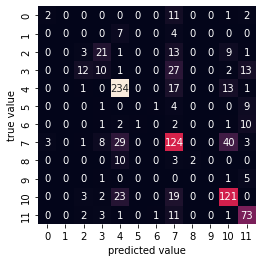

In [4]:
rf = RandomForestClassifier(n_estimators = 200)


fin_test = np.array([])
fin_pred = np.array([])

for i,(train, test) in enumerate(KFold(n_splits=3).split(x)):
    #Train-Test-Split
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    rf.fit(x_train, y_train)

    fin_test = np.concatenate((fin_test, y_test), axis=0)
    fin_pred = np.concatenate((fin_pred, rf.predict(x_test)), axis=0)
    
print("RandomForestClassifier")
print(classification_report(fin_test, fin_pred))

sns.heatmap(confusion_matrix(fin_test, fin_pred), square= True, fmt ='.0f', annot=True, cbar=False)

plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
